In [1]:
from google.colab import drive
contents = drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

# Unzip the Titanic dataset
zip_path = '/content/drive/MyDrive/titanic.zip'  # Replace if your ZIP file has a different name
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/titanic_data')

# Check contents
os.listdir('/content/titanic_data')


['gender_submission.csv', 'train.csv', 'test.csv']

In [4]:
import pandas as pd

# Load the training dataset (usually named train.csv)
df = pd.read_csv('/content/titanic_data/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
 # Basic info
df.info()

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Fill missing Age with median (safe method)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (safe method)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Confirm cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB

Missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

Missing 

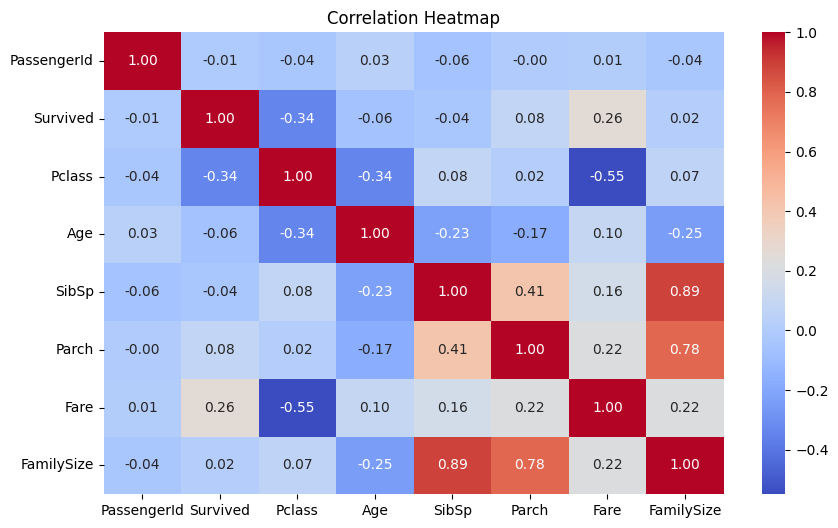

In [12]:
# Basic stats
df.describe()

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


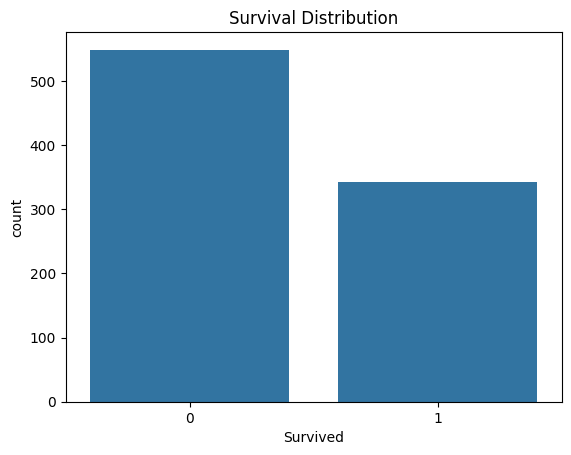

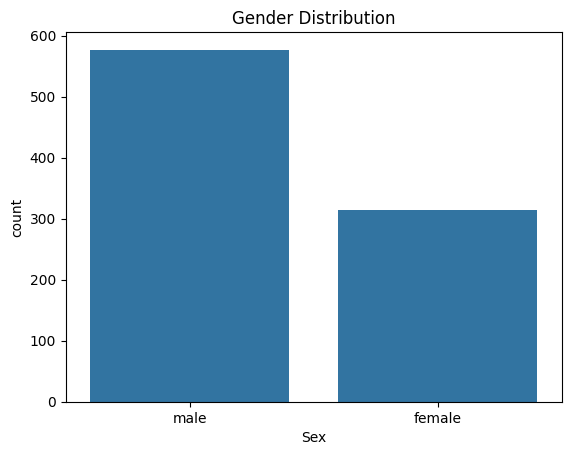

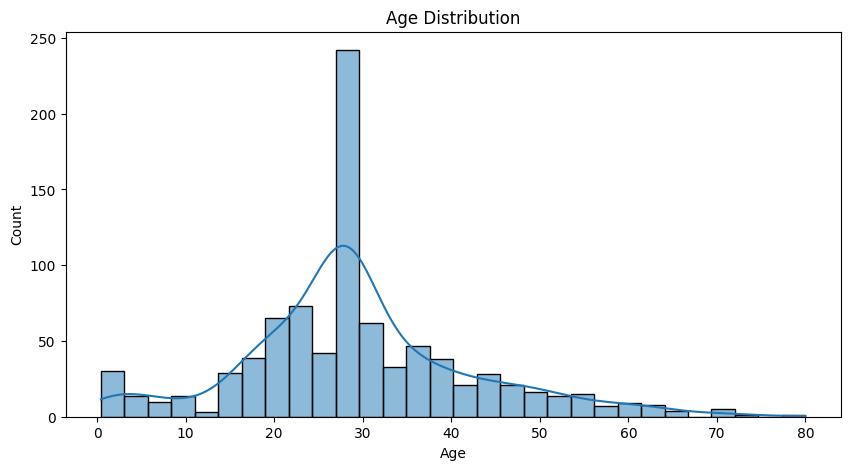

In [13]:
# Survival Count
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')
plt.show()

# Gender Distribution
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


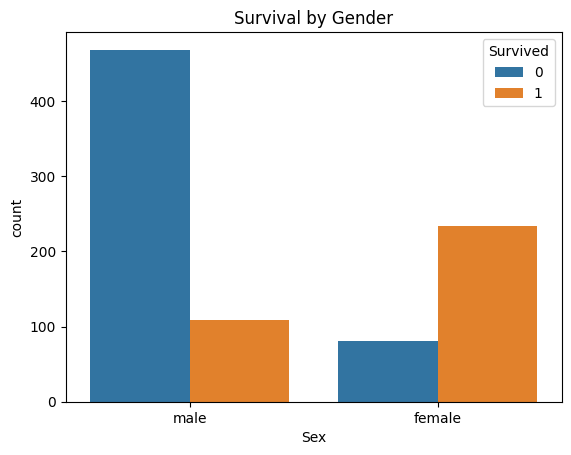

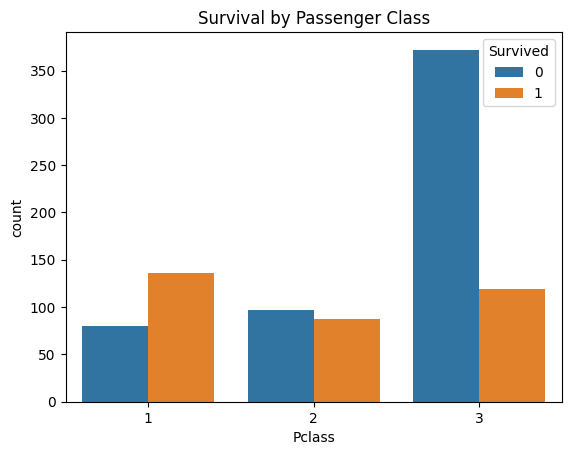

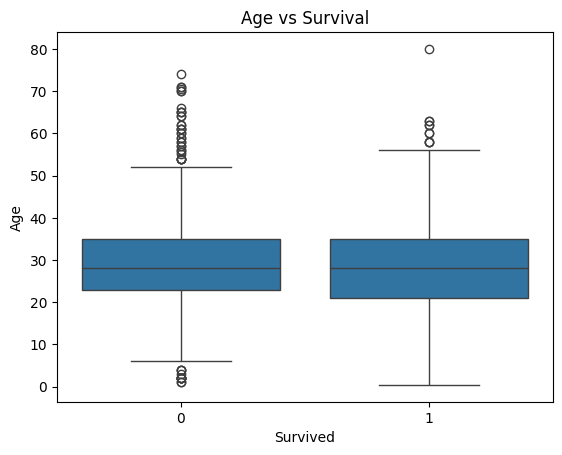

In [14]:
# Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

# Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# Age vs Survival
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.show()


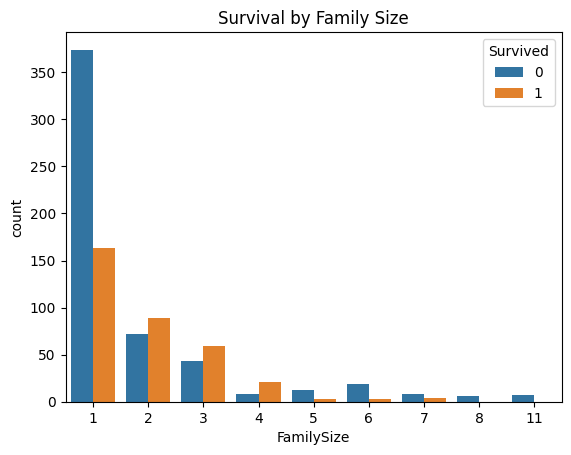

In [15]:
# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Survival by Family Size
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.show()
